# GradCAM Analysis for Poorly Performing Autism Detection Models

This notebook implements Gradient-weighted Class Activation Mapping (GradCAM) visualization to understand why certain models performed poorly on autism detection and what facial features they incorrectly focus on.

## Overview
GradCAM helps us analyze poorly performing models to:
- **Understand Failure Modes**: Identify why certain architectures failed
- **Detect Bias**: See if models focus on irrelevant features or artifacts
- **Compare Focus Patterns**: Understand differences between good vs poor performing models
- **Guide Model Improvement**: Insights for better architecture selection

# 1. Import Libraries

Import all necessary libraries for GradCAM analysis, model loading, and visualization.

In [1]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-zgst23ir
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-zgst23ir
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 781dbc0d16ffa95b6d18b96b7b829840a82d93d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3

In [2]:
!pip install facenet_pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166

In [3]:
!pip install --upgrade pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.3.0 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have ric

In [4]:
# Core libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from pathlib import Path
import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# PyTorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader

# GradCAM libraries
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# Model-specific libraries
from facenet_pytorch import InceptionResnetV1
import timm

# Sklearn for metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Setup Environment Configuration

Configure environment settings and global variables for poorly performing models analysis.

In [5]:
# Check versions of key libraries
print("Library Versions:")
print(f"PyTorch: {torch.__version__}")
print(f"Torchvision: {torchvision.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")

# Check PyTorch device availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nDevice: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA Version: {torch.version.cuda}")

# Verify GradCAM import
try:
    from pytorch_grad_cam import GradCAM
    print("✓ GradCAM successfully imported")
except ImportError as e:
    print(f"✗ GradCAM import failed: {e}")

# Verify timm import for transformer models
try:
    import timm
    print("✓ timm successfully imported")
except ImportError as e:
    print(f"✗ timm import failed: {e}")

# Check if model files exist
model_path = "/kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results"
if os.path.exists(model_path):
    models_available = [f for f in os.listdir(model_path) if f.endswith('.pth')]
    print(f"\n✓ Model directory found with {len(models_available)} model files:")
    
    # Filter for working models (removed problematic ones)
    poor_models = [m for m in models_available if any(poor in m.lower() for poor in 
                   ['alexnet', 'convnext', 'swin', 'vgg'])]
    
    print(f"Poor performing models found: {len(poor_models)}")
    for model in sorted(poor_models):
        print(f"  - {model}")
else:
    print(f"✗ Model directory not found: {model_path}")

Library Versions:
PyTorch: 2.2.2+cu121
Torchvision: 0.17.2+cu121
NumPy: 1.26.4
Pandas: 2.2.3
Matplotlib: 3.7.2

Device: cuda
GPU: Tesla P100-PCIE-16GB
CUDA Version: 12.1
✓ GradCAM successfully imported
✓ timm successfully imported

✓ Model directory found with 33 model files:
Poor performing models found: 10
  - best_alexnet.pth
  - best_convnext_base_autism.pth
  - best_convnext_small_autism.pth
  - best_convnext_tiny_autism.pth
  - best_swin_base_autism.pth
  - best_swin_small_autism.pth
  - best_swin_tiny_autism.pth
  - best_vgg16.pth
  - best_vgg19.pth
  - best_vggface2_autism.pth


# 3. Environment Configuration

Configure matplotlib, pandas, and global variables for the analysis.

In [6]:
# Configure matplotlib for inline plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

# Configure seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Configure PyTorch for deterministic behavior
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Define global variables - Updated for poorly performing models
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH = "/kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results"
DATA_PATH = "/kaggle/input/autism-image-data/AutismDataset"
OUTPUT_PATH = "/kaggle/working/"

# Working models to analyze (removed problematic ViT, MViT, DeiT, ArcFace, CosFace)
POOR_MODELS = [
    'alexnet', 'convnext_tiny', 'convnext_small', 
    'swin_tiny', 'swin_small', 'swin_base',
    'vgg16', 'vgg19'
]

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_PATH, exist_ok=True)

print("Environment configured successfully for poor models analysis!")
print(f"Device: {DEVICE}")
print(f"Model path: {MODEL_PATH}")
print(f"Data path: {DATA_PATH}")
print(f"Output path: {OUTPUT_PATH}")
print(f"Target poor models: {POOR_MODELS}")

Environment configured successfully for poor models analysis!
Device: cuda
Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results
Data path: /kaggle/input/autism-image-data/AutismDataset
Output path: /kaggle/working/
Target poor models: ['alexnet', 'convnext_tiny', 'convnext_small', 'swin_tiny', 'swin_small', 'swin_base', 'vgg16', 'vgg19']


# 4. Model Architecture Definitions for Poor Performers

Define architectures for poorly performing models based on the implementations in "w:o augmentation" folder.

In [7]:
import timm

# AlexNet Model
class AlexNetModel(nn.Module):
    def __init__(self, num_classes=2):
        super(AlexNetModel, self).__init__()
        # Create AlexNet directly (same as original training)
        model = models.alexnet(pretrained=True)
        # Modify classifier (same as original training)
        num_features = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_features, num_classes)
        
        # Copy all layers directly to this model
        self.features = model.features
        self.avgpool = model.avgpool  
        self.classifier = model.classifier
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# VGG Models - Fixed to match original training
class VGGModel(nn.Module):
    def __init__(self, variant='vgg16', num_classes=2):
        super(VGGModel, self).__init__()
        # Create VGG directly (same as original training)
        if variant == 'vgg16':
            model = models.vgg16(pretrained=True)
        elif variant == 'vgg19':
            model = models.vgg19(pretrained=True)
        
        # Modify classifier (same as original training)
        num_features = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_features, num_classes)
        
        # Copy all layers directly to this model
        self.features = model.features
        self.avgpool = model.avgpool
        self.classifier = model.classifier
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Transformer Models using timm
class TransformerModel(nn.Module):
    def __init__(self, model_name, num_classes=2):
        super(TransformerModel, self).__init__()
        self.model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
    
    def forward(self, x):
        return self.model(x)

# Fixed Model Architectures - EXACT MATCH to original training
# All models are created directly using timm.create_model (no wrapper classes)

def get_target_layer_for_model(model, model_name):
    """Get appropriate target layer for GradCAM based on model architecture"""
    
    if 'alexnet' in model_name.lower():
        return model.features[-1]  # Last conv layer
    
    elif 'vgg' in model_name.lower():
        return model.features[-3]  # Last conv layer before pooling
    
    elif 'convnext' in model_name.lower():
        # ConvNeXt: Use last convolutional stage (direct timm model)
        return model.stages[-1].blocks[-1].conv_dw
    
    elif 'swin' in model_name.lower():
        # Swin Transformer: Use last layer of last stage (direct timm model)
        return model.layers[-1].blocks[-1].norm1
    

    
    else:
        # Fallback: try to find last convolutional layer
        for name, module in reversed(list(model.named_modules())):
            if isinstance(module, (nn.Conv2d, nn.BatchNorm2d)):
                return module
        return None

def load_poor_model(model_name, model_path, device):
    """Load a poorly performing model from checkpoint - EXACT MATCH to original training"""
    
    print(f"🔧 Loading model: {model_name}")
    print(f"📁 Model path: {model_path}")
    
    try:
        if 'alexnet' in model_name.lower():
            model = AlexNetModel(num_classes=2)
        
        elif 'vgg16' in model_name.lower():
            model = VGGModel(variant='vgg16', num_classes=2)
            
        elif 'vgg19' in model_name.lower():
            model = VGGModel(variant='vgg19', num_classes=2)
            
        elif 'convnext_tiny' in model_name.lower():
            # FIXED: Create direct timm model (same as original training)
            model = timm.create_model('convnext_tiny', pretrained=True, num_classes=2)
        
        elif 'convnext_small' in model_name.lower():
            model = timm.create_model('convnext_small', pretrained=True, num_classes=2)
            
        elif 'convnext_base' in model_name.lower():
            model = timm.create_model('convnext_base', pretrained=True, num_classes=2)
            
        elif 'swin_tiny' in model_name.lower():
            # FIXED: Create direct timm model (same as original training)
            model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=2)
        
        elif 'swin_small' in model_name.lower():
            model = timm.create_model('swin_small_patch4_window7_224', pretrained=True, num_classes=2)
            
        elif 'swin_base' in model_name.lower():
            model = timm.create_model('swin_base_patch4_window7_224', pretrained=True, num_classes=2)
            


        else:
            raise ValueError(f"Unknown model architecture: {model_name}")
        
        # Load the trained weights
        print(f"🔄 Loading checkpoint from: {model_path}")
        try:
            checkpoint = torch.load(model_path, map_location=device)
            print(f"✓ Checkpoint loaded successfully")
            
            # Handle different checkpoint formats
            if isinstance(checkpoint, dict):
                if 'state_dict' in checkpoint:
                    model.load_state_dict(checkpoint['state_dict'])
                    print("✓ Loaded from 'state_dict' key")
                elif 'model' in checkpoint:
                    model.load_state_dict(checkpoint['model'])
                    print("✓ Loaded from 'model' key")
                else:
                    model.load_state_dict(checkpoint)
                    print("✓ Loaded checkpoint as state dict")
            else:
                model.load_state_dict(checkpoint)
                print("✓ Loaded checkpoint directly")
                
            print(f"✅ Successfully loaded model: {model_name}")
            
        except Exception as e:
            print(f"❌ Failed to load checkpoint for {model_name}: {e}")
            try:
                print(f"📋 Checkpoint keys: {list(checkpoint.keys()) if isinstance(checkpoint, dict) else 'Not a dictionary'}")
            except:
                print("📋 Could not examine checkpoint structure")
            return None, None
        
        # Move model to device and set to eval mode
        print(f"🔧 Moving model to device: {device}")
        model.to(device)
        model.eval()
        
        # Get target layer for GradCAM
        print(f"🎯 Finding target layer for GradCAM...")
        target_layer = get_target_layer_for_model(model, model_name)
        
        if target_layer is not None:
            print(f"✅ Target layer found: {type(target_layer).__name__}")
        else:
            print(f"⚠️  No suitable target layer found for {model_name}")
            
        return model, target_layer
    
    except Exception as e:
        print(f"❌ Error creating model architecture for {model_name}: {e}")
        print(f"📋 Error type: {type(e).__name__}")
        import traceback
        print(f"🔍 Traceback: {traceback.format_exc()}")
        return None, None

print("Poor performing model architectures defined successfully!")

Poor performing model architectures defined successfully!


In [8]:
# Enhanced debugging functions for model architecture analysis
def debug_model_architecture(model, model_name, max_depth=3):
    """Debug model architecture to find suitable target layers"""
    print(f"\n🔍 DEBUGGING MODEL ARCHITECTURE: {model_name}")
    print("=" * 60)
    
    def print_module_tree(module, name="", depth=0, max_depth=3):
        if depth > max_depth:
            return
            
        indent = "  " * depth
        module_type = type(module).__name__
        
        # Show important layers
        if any(keyword in module_type.lower() for keyword in ['conv', 'linear', 'norm', 'attention', 'block']):
            print(f"{indent}📦 {name}: {module_type}")
            
            # Show shape info for key layers
            if hasattr(module, 'weight') and hasattr(module.weight, 'shape'):
                print(f"{indent}    Shape: {module.weight.shape}")
        
        # Recursively print children
        for child_name, child_module in module.named_children():
            full_name = f"{name}.{child_name}" if name else child_name
            print_module_tree(child_module, full_name, depth + 1, max_depth)
    
    print_module_tree(model)
    
    # Specific analysis for different model types
    print(f"\n🎯 TARGET LAYER ANALYSIS for {model_name}:")
    
    if 'vit' in model_name.lower() or 'deit' in model_name.lower():
        print("📝 Vision Transformer detected")
        if hasattr(model, 'blocks'):
            print(f"   - Found {len(model.blocks)} transformer blocks")
            print(f"   - Last block type: {type(model.blocks[-1]).__name__}")
        
    elif 'mvit' in model_name.lower():
        print("📝 MViT detected")
        for attr in ['blocks', 'stages', 'layers']:
            if hasattr(model, attr):
                attr_val = getattr(model, attr)
                print(f"   - Found {attr}: {len(attr_val)} items")
    
    elif 'arcface' in model_name.lower() or 'cosface' in model_name.lower():
        print("📝 Face recognition model detected")
        if hasattr(model, 'backbone'):
            print("   - Has backbone attribute")
            if hasattr(model.backbone, 'layer4'):
                print("   - Backbone has layer4")
        
    print("=" * 60)

def test_target_layer_compatibility(model, target_layer, model_name):
    """Test if the target layer is compatible with GradCAM"""
    if target_layer is None:
        print(f"❌ No target layer found for {model_name}")
        return False
    
    print(f"\n🧪 TESTING TARGET LAYER: {type(target_layer).__name__}")
    
    try:
        # Create a dummy input
        dummy_input = torch.randn(1, 3, 224, 224).to(next(model.parameters()).device)
        
        # Test forward pass
        with torch.no_grad():
            output = model(dummy_input)
            print(f"✅ Forward pass successful. Output shape: {output.shape}")
        
        # Test if we can register hooks on the target layer
        activations = []
        def hook_fn(module, input, output):
            activations.append(output)
        
        handle = target_layer.register_forward_hook(hook_fn)
        
        with torch.no_grad():
            _ = model(dummy_input)
        
        handle.remove()
        
        if activations:
            print(f"✅ Hook registration successful. Activation shape: {activations[0].shape}")
            return True
        else:
            print(f"❌ Hook registration failed - no activations captured")
            return False
            
    except Exception as e:
        print(f"❌ Target layer test failed: {e}")
        return False

print("🔧 Enhanced debugging functions loaded!")

🔧 Enhanced debugging functions loaded!


In [9]:
# Comprehensive model fixing and analysis
def analyze_and_fix_model_issues(model_names_to_fix):
    """Analyze and fix issues with specific models"""
    
    print("🚀 COMPREHENSIVE MODEL ANALYSIS AND FIXING")
    print("=" * 70)
    
    results = {}
    
    for model_name in model_names_to_fix:
        print(f"\n🔍 ANALYZING: {model_name}")
        print("-" * 50)
        
        try:
            # Find model file
            model_files = [f for f in os.listdir(MODEL_PATH) if model_name.lower() in f.lower() and f.endswith('.pth')]
            
            if not model_files:
                print(f"❌ No model file found for {model_name}")
                results[model_name] = {"status": "failed", "reason": "Model file not found"}
                continue
            
            model_file = model_files[0]
            model_path = os.path.join(MODEL_PATH, model_file)
            print(f"📁 Found model file: {model_file}")
            
            # Load model with enhanced debugging
            model, target_layer = load_poor_model(model_name, model_path, DEVICE)
            
            if model is None:
                print(f"❌ Failed to load model: {model_name}")
                results[model_name] = {"status": "failed", "reason": "Model loading failed"}
                continue
            
            # Debug architecture
            debug_model_architecture(model, model_name, max_depth=2)
            
            # Test target layer
            layer_compatible = test_target_layer_compatibility(model, target_layer, model_name)
            
            if not layer_compatible:
                print(f"⚠️  Target layer issues detected for {model_name}")
                # Try to find alternative target layer
                print("🔄 Searching for alternative target layer...")
                alternative_layer = find_alternative_target_layer(model, model_name)
                if alternative_layer:
                    print(f"✅ Found alternative target layer: {type(alternative_layer).__name__}")
                    target_layer = alternative_layer
                    layer_compatible = test_target_layer_compatibility(model, target_layer, model_name)
            
            # Test GradCAM analysis
            if layer_compatible and target_layer:
                print(f"🧪 Testing GradCAM analysis...")
                try:
                    analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                    print(f"✅ GradCAM analyzer created successfully")
                    results[model_name] = {"status": "success", "model": model, "analyzer": analyzer}
                except Exception as e:
                    print(f"❌ GradCAM analyzer creation failed: {e}")
                    results[model_name] = {"status": "failed", "reason": f"GradCAM creation failed: {e}"}
            else:
                results[model_name] = {"status": "failed", "reason": "Target layer incompatible"}
                
        except Exception as e:
            print(f"❌ Critical error analyzing {model_name}: {e}")
            results[model_name] = {"status": "failed", "reason": f"Critical error: {e}"}
    
    # Summary
    print(f"\n📊 ANALYSIS SUMMARY")
    print("=" * 70)
    successful = [name for name, result in results.items() if result["status"] == "success"]
    failed = [name for name, result in results.items() if result["status"] == "failed"]
    
    print(f"✅ Successful models ({len(successful)}): {', '.join(successful)}")
    print(f"❌ Failed models ({len(failed)}): {', '.join(failed)}")
    
    if failed:
        print(f"\n🔍 Failure reasons:")
        for name in failed:
            print(f"   - {name}: {results[name]['reason']}")
    
    return results

def find_alternative_target_layer(model, model_name):
    """Find alternative target layer when the default one fails"""
    
    print(f"🔍 Searching for alternative target layers in {model_name}...")
    
    # Strategy 1: Look for common layer patterns
    candidates = []
    
    for name, module in model.named_modules():
        # Prioritize certain layer types
        if isinstance(module, (nn.Conv2d, nn.BatchNorm2d, nn.LayerNorm)):
            candidates.append((name, module, 'normalization'))
        elif isinstance(module, nn.MultiheadAttention):
            candidates.append((name, module, 'attention'))
        elif 'block' in name.lower() and isinstance(module, nn.Module):
            candidates.append((name, module, 'block'))
    
    # Sort candidates by priority and position
    def sort_key(item):
        name, module, layer_type = item
        # Prefer layers that appear later in the model
        depth = name.count('.')
        # Prefer certain types
        type_priority = {'attention': 3, 'normalization': 2, 'block': 1}
        return (depth, type_priority.get(layer_type, 0))
    
    candidates.sort(key=sort_key, reverse=True)
    
    # Test top candidates
    for name, module, layer_type in candidates[:5]:
        print(f"   Testing candidate: {name} ({layer_type})")
        if test_target_layer_compatibility(model, module, model_name):
            print(f"   ✅ Found working alternative: {name}")
            return module
    
    print(f"   ❌ No suitable alternative found")
    return None

print("🔧 Comprehensive analysis functions loaded!")

🔧 Comprehensive analysis functions loaded!


In [10]:
# Test and fix the specific problematic models
print("🎯 TESTING SPECIFIC PROBLEMATIC MODELS")
print("=" * 70)

# Working models to test (removed problematic ones)
working_models = ['alexnet', 'convnext_tiny', 'convnext_small', 'swin_tiny', 'swin_small', 'swin_base', 'vgg16', 'vgg19']

# Check if model files exist first
print("📁 Checking for model files...")
available_problematic_models = []
for model_name in working_models:
    model_files = []
    if os.path.exists(MODEL_PATH):
        model_files = [f for f in os.listdir(MODEL_PATH) if model_name.lower() in f.lower() and f.endswith('.pth')]
    
    if model_files:
        available_problematic_models.append(model_name)
        print(f"✅ {model_name}: {model_files[0]}")
    else:
        print(f"❌ {model_name}: No model file found")

if available_problematic_models:
    print(f"\n🔧 Analyzing {len(available_problematic_models)} available problematic models...")
    results = analyze_and_fix_model_issues(available_problematic_models)
    
    # Store results for later use
    FIXED_MODEL_RESULTS = results
    
    print(f"\n✅ Analysis complete! Results stored in FIXED_MODEL_RESULTS")
else:
    print(f"\n⚠️  No problematic model files found in {MODEL_PATH}")
    print("Please ensure the model files are available in the models directory.")
    FIXED_MODEL_RESULTS = {}

🎯 TESTING SPECIFIC PROBLEMATIC MODELS
📁 Checking for model files...
✅ alexnet: best_alexnet.pth
✅ convnext_tiny: best_convnext_tiny_autism.pth
✅ convnext_small: best_convnext_small_autism.pth
✅ swin_tiny: best_swin_tiny_autism.pth
✅ swin_small: best_swin_small_autism.pth
✅ swin_base: best_swin_base_autism.pth
✅ vgg16: best_vgg16.pth
✅ vgg19: best_vgg19.pth

🔧 Analyzing 8 available problematic models...
🚀 COMPREHENSIVE MODEL ANALYSIS AND FIXING

🔍 ANALYZING: alexnet
--------------------------------------------------
📁 Found model file: best_alexnet.pth
🔧 Loading model: alexnet
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 163MB/s]


🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: alexnet
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: MaxPool2d

🔍 DEBUGGING MODEL ARCHITECTURE: alexnet
    📦 features.0: Conv2d
        Shape: torch.Size([64, 3, 11, 11])
    📦 features.3: Conv2d
        Shape: torch.Size([192, 64, 5, 5])
    📦 features.6: Conv2d
        Shape: torch.Size([384, 192, 3, 3])
    📦 features.8: Conv2d
        Shape: torch.Size([256, 384, 3, 3])
    📦 features.10: Conv2d
        Shape: torch.Size([256, 256, 3, 3])
    📦 classifier.1: Linear
        Shape: torch.Size([4096, 9216])
    📦 classifier.4: Linear
        Shape: torch.Size([4096, 4096])
    📦 classifier.6: Linear
        Shape: torch.Size([2, 4096])

🎯 TARGET LAYER ANALYSIS for alexnet:

🧪 TESTING TARGET LAYER: MaxPool2d
✅ Forwar

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_convnext_tiny_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: convnext_tiny
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: Conv2d

🔍 DEBUGGING MODEL ARCHITECTURE: convnext_tiny
📦 : ConvNeXt
    📦 stem.0: Conv2d
        Shape: torch.Size([96, 3, 4, 4])
    📦 stem.1: LayerNorm2d
        Shape: torch.Size([96])
    📦 stages.0: ConvNeXtStage
    📦 stages.1: ConvNeXtStage
    📦 stages.2: ConvNeXtStage
    📦 stages.3: ConvNeXtStage
  📦 head: NormMlpClassifierHead
    📦 head.norm: LayerNorm2d
        Shape: torch.Size([768])
    📦 head.fc: Linear
        Shape: torch.Size([2, 768])

🎯 TARGET LAYER ANALYSIS for convnext_tiny:

🧪 TESTING TARGET LAYER: Conv2d
✅ Forward pass successful. Output shape: torch.Size([1, 2])
✅ Hook registration successful. Activation shape: torch.Size

model.safetensors:   0%|          | 0.00/201M [00:00<?, ?B/s]

🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_convnext_small_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: convnext_small
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: Conv2d

🔍 DEBUGGING MODEL ARCHITECTURE: convnext_small
📦 : ConvNeXt
    📦 stem.0: Conv2d
        Shape: torch.Size([96, 3, 4, 4])
    📦 stem.1: LayerNorm2d
        Shape: torch.Size([96])
    📦 stages.0: ConvNeXtStage
    📦 stages.1: ConvNeXtStage
    📦 stages.2: ConvNeXtStage
    📦 stages.3: ConvNeXtStage
  📦 head: NormMlpClassifierHead
    📦 head.norm: LayerNorm2d
        Shape: torch.Size([768])
    📦 head.fc: Linear
        Shape: torch.Size([2, 768])

🎯 TARGET LAYER ANALYSIS for convnext_small:

🧪 TESTING TARGET LAYER: Conv2d
✅ Forward pass successful. Output shape: torch.Size([1, 2])
✅ Hook registration successful. Activation shape: torch.

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_swin_tiny_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: swin_tiny
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: LayerNorm

🔍 DEBUGGING MODEL ARCHITECTURE: swin_tiny
    📦 patch_embed.proj: Conv2d
        Shape: torch.Size([96, 3, 4, 4])
    📦 patch_embed.norm: LayerNorm
        Shape: torch.Size([96])
  📦 norm: LayerNorm
      Shape: torch.Size([768])
    📦 head.fc: Linear
        Shape: torch.Size([2, 768])

🎯 TARGET LAYER ANALYSIS for swin_tiny:

🧪 TESTING TARGET LAYER: LayerNorm
✅ Forward pass successful. Output shape: torch.Size([1, 2])
✅ Hook registration successful. Activation shape: torch.Size([1, 7, 7, 768])
🧪 Testing GradCAM analysis...
❌ GradCAM analyzer creation failed: name 'GradCAMAnalyzer' is not defined

🔍 ANALYZING: swin_small
----------------------

model.safetensors:   0%|          | 0.00/200M [00:00<?, ?B/s]

🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_swin_small_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: swin_small
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: LayerNorm

🔍 DEBUGGING MODEL ARCHITECTURE: swin_small
    📦 patch_embed.proj: Conv2d
        Shape: torch.Size([96, 3, 4, 4])
    📦 patch_embed.norm: LayerNorm
        Shape: torch.Size([96])
  📦 norm: LayerNorm
      Shape: torch.Size([768])
    📦 head.fc: Linear
        Shape: torch.Size([2, 768])

🎯 TARGET LAYER ANALYSIS for swin_small:

🧪 TESTING TARGET LAYER: LayerNorm
✅ Forward pass successful. Output shape: torch.Size([1, 2])
✅ Hook registration successful. Activation shape: torch.Size([1, 7, 7, 768])
🧪 Testing GradCAM analysis...
❌ GradCAM analyzer creation failed: name 'GradCAMAnalyzer' is not defined

🔍 ANALYZING: swin_base
-------------------

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_swin_base_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: swin_base
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: LayerNorm

🔍 DEBUGGING MODEL ARCHITECTURE: swin_base
    📦 patch_embed.proj: Conv2d
        Shape: torch.Size([128, 3, 4, 4])
    📦 patch_embed.norm: LayerNorm
        Shape: torch.Size([128])
  📦 norm: LayerNorm
      Shape: torch.Size([1024])
    📦 head.fc: Linear
        Shape: torch.Size([2, 1024])

🎯 TARGET LAYER ANALYSIS for swin_base:

🧪 TESTING TARGET LAYER: LayerNorm
✅ Forward pass successful. Output shape: torch.Size([1, 2])
✅ Hook registration successful. Activation shape: torch.Size([1, 7, 7, 1024])
🧪 Testing GradCAM analysis...
❌ GradCAM analyzer creation failed: name 'GradCAMAnalyzer' is not defined

🔍 ANALYZING: vgg16
----------------------

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 162MB/s]


🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_vgg16.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: vgg16
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: Conv2d

🔍 DEBUGGING MODEL ARCHITECTURE: vgg16
    📦 features.0: Conv2d
        Shape: torch.Size([64, 3, 3, 3])
    📦 features.2: Conv2d
        Shape: torch.Size([64, 64, 3, 3])
    📦 features.5: Conv2d
        Shape: torch.Size([128, 64, 3, 3])
    📦 features.7: Conv2d
        Shape: torch.Size([128, 128, 3, 3])
    📦 features.10: Conv2d
        Shape: torch.Size([256, 128, 3, 3])
    📦 features.12: Conv2d
        Shape: torch.Size([256, 256, 3, 3])
    📦 features.14: Conv2d
        Shape: torch.Size([256, 256, 3, 3])
    📦 features.17: Conv2d
        Shape: torch.Size([512, 256, 3, 3])
    📦 features.19: Conv2d
        Shape: torch.Size([512, 512, 3, 3])
    📦 featur

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:09<00:00, 61.5MB/s]


🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_vgg19.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: vgg19
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: Conv2d

🔍 DEBUGGING MODEL ARCHITECTURE: vgg19
    📦 features.0: Conv2d
        Shape: torch.Size([64, 3, 3, 3])
    📦 features.2: Conv2d
        Shape: torch.Size([64, 64, 3, 3])
    📦 features.5: Conv2d
        Shape: torch.Size([128, 64, 3, 3])
    📦 features.7: Conv2d
        Shape: torch.Size([128, 128, 3, 3])
    📦 features.10: Conv2d
        Shape: torch.Size([256, 128, 3, 3])
    📦 features.12: Conv2d
        Shape: torch.Size([256, 256, 3, 3])
    📦 features.14: Conv2d
        Shape: torch.Size([256, 256, 3, 3])
    📦 features.16: Conv2d
        Shape: torch.Size([256, 256, 3, 3])
    📦 features.19: Conv2d
        Shape: torch.Size([512, 256, 3, 3])
    📦 featur

In [11]:
# Enhanced GradCAM Analyzer for transformer models
class EnhancedGradCAMAnalyzer:
    """Enhanced GradCAM analyzer with better support for transformer models"""
    
    def __init__(self, model, target_layer, device, model_name=""):
        self.model = model
        self.target_layer = target_layer
        self.device = device
        self.model_name = model_name
        
        # Choose appropriate GradCAM method based on model type
        if 'swin' in model_name.lower():
            print(f"🔬 Using transformer-optimized GradCAM for {model_name}")
            # For Swin transformers, we might need different approaches
            self.cam = GradCAM(model=model, target_layers=[target_layer])
        else:
            print(f"🔬 Using standard GradCAM for {model_name}")
            self.cam = GradCAM(model=model, target_layers=[target_layer])
    
    def generate_gradcam_safe(self, input_tensor, target_class=None, original_image=None):
        """Generate GradCAM with enhanced error handling"""
        
        try:
            # Move input to device
            input_tensor = input_tensor.to(self.device)
            
            # Get model prediction
            with torch.no_grad():
                output = self.model(input_tensor)
                
                # Handle different output formats
                if isinstance(output, tuple):
                    output = output[0]  # Take first element if tuple
                
                if output.dim() == 1:
                    output = output.unsqueeze(0)  # Add batch dimension if missing
                
                prediction = torch.softmax(output, dim=1)
                predicted_class = torch.argmax(prediction, dim=1).item()
                confidence = torch.max(prediction, dim=1)[0].item()
            
            # Use predicted class if target not specified
            if target_class is None:
                target_class = predicted_class
            
            print(f"🎯 Generating GradCAM for class {target_class} (predicted: {predicted_class}, confidence: {confidence:.3f})")
            
            # Generate GradCAM with error handling
            try:
                targets = [ClassifierOutputTarget(target_class)]
                grayscale_cam = self.cam(input_tensor=input_tensor, targets=targets)
                
                # Get the first (and only) image from batch
                grayscale_cam = grayscale_cam[0, :]
                
                print(f"✅ GradCAM generated successfully. Shape: {grayscale_cam.shape}")
                
            except Exception as cam_error:
                print(f"❌ GradCAM generation failed: {cam_error}")
                # Return dummy cam for visualization
                grayscale_cam = np.zeros((224, 224))
                print(f"⚠️  Using dummy GradCAM")
            
            # Create visualization
            if original_image is not None:
                try:
                    visualization = show_cam_on_image(original_image, grayscale_cam, use_rgb=True)
                    print(f"✅ Visualization created successfully")
                except Exception as vis_error:
                    print(f"❌ Visualization creation failed: {vis_error}")
                    visualization = original_image  # Fallback to original image
            else:
                # If no original image, use denormalized tensor
                try:
                    rgb_img = denormalize_image(input_tensor[0], self.model_name).permute(1, 2, 0).cpu().numpy()
                    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
                except Exception as vis_error:
                    print(f"❌ Tensor visualization failed: {vis_error}")
                    visualization = np.zeros((224, 224, 3))
            
            return {
                'prediction': predicted_class,
                'confidence': confidence,
                'grayscale_cam': grayscale_cam,
                'visualization': visualization,
                'target_class': target_class,
                'success': True
            }
            
        except Exception as e:
            print(f"❌ Critical error in GradCAM generation: {e}")
            import traceback
            print(f"🔍 Traceback: {traceback.format_exc()}")
            
            # Return failure result
            return {
                'prediction': 0,
                'confidence': 0.5,
                'grayscale_cam': np.zeros((224, 224)),
                'visualization': np.zeros((224, 224, 3)),
                'target_class': target_class or 0,
                'success': False,
                'error': str(e)
            }
    
    def analyze_image_safe(self, image_path, save_results=True):
        """Complete analysis of a single image with enhanced error handling"""
        
        print(f"\n🖼️  ANALYZING IMAGE: {os.path.basename(image_path)}")
        print("-" * 50)
        
        try:
            # Preprocess image
            input_tensor, original_image = preprocess_image(image_path, self.model_name)
            print(f"✅ Image preprocessed. Input shape: {input_tensor.shape}")
            
            # Generate GradCAM for both classes
            results = {}
            
            # Analysis for class 0 (Non-Autistic)
            print(f"🔍 Analyzing for Non-Autistic class...")
            results['non_autistic'] = self.generate_gradcam_safe(
                input_tensor, target_class=0, original_image=original_image
            )
            
            # Analysis for class 1 (Autistic)
            print(f"🔍 Analyzing for Autistic class...")
            results['autistic'] = self.generate_gradcam_safe(
                input_tensor, target_class=1, original_image=original_image
            )
            
            # Get actual prediction
            results['prediction'] = results['non_autistic']['prediction']
            results['confidence'] = results['non_autistic']['confidence']
            results['success'] = results['non_autistic']['success'] and results['autistic']['success']
            
            # Save results if requested and successful
            if save_results and results['success']:
                self.save_analysis_results_safe(image_path, results)
            elif save_results:
                print(f"⚠️  Skipping save due to analysis errors")
            
            return results
            
        except Exception as e:
            print(f"❌ Critical error in image analysis: {e}")
            return {
                'prediction': 0,
                'confidence': 0.5,
                'success': False,
                'error': str(e)
            }
    
    def save_analysis_results_safe(self, image_path, results):
        """Save GradCAM visualizations with error handling"""
        
        try:
            # Create filename base
            image_name = Path(image_path).stem
            base_filename = f"{self.model_name}_{image_name}"
            
            # Create model-specific output directory
            model_output_dir = os.path.join(OUTPUT_PATH, self.model_name)
            os.makedirs(model_output_dir, exist_ok=True)
            
            # Save visualizations
            plt.figure(figsize=(15, 5))
            
            # Original image
            plt.subplot(1, 3, 1)
            original_img = Image.open(image_path)
            plt.imshow(original_img)
            plt.title('Original Image')
            plt.axis('off')
            
            # GradCAM for Non-Autistic class
            plt.subplot(1, 3, 2)
            plt.imshow(results['non_autistic']['visualization'])
            plt.title(f'GradCAM - Non-Autistic\\nConfidence: {results["non_autistic"]["confidence"]:.3f}')
            plt.axis('off')
            
            # GradCAM for Autistic class
            plt.subplot(1, 3, 3)
            plt.imshow(results['autistic']['visualization'])
            plt.title(f'GradCAM - Autistic\\nConfidence: {results["autistic"]["confidence"]:.3f}')
            plt.axis('off')
            
            # Add prediction info
            pred_class = "Autistic" if results['prediction'] == 1 else "Non-Autistic"
            plt.suptitle(f'Prediction: {pred_class} (Confidence: {results["confidence"]:.3f})', fontsize=14)
            
            # Save plot
            output_file = os.path.join(model_output_dir, f"{base_filename}_gradcam.png")
            plt.tight_layout()
            plt.savefig(output_file, dpi=300, bbox_inches='tight')
            plt.close()
            
            print(f"💾 Results saved to: {output_file}")
            
        except Exception as e:
            print(f"❌ Error saving results: {e}")

print("🔧 Enhanced GradCAM Analyzer loaded!")

🔧 Enhanced GradCAM Analyzer loaded!


In [12]:
# COMPREHENSIVE TEST: Run the fixed models on a sample image
print("🚀 COMPREHENSIVE TEST OF FIXED MODELS")
print("=" * 70)

# Check if we have any successful models from previous analysis
if 'FIXED_MODEL_RESULTS' in globals() and FIXED_MODEL_RESULTS:
    successful_models = [name for name, result in FIXED_MODEL_RESULTS.items() if result["status"] == "success"]
    
    if successful_models:
        print(f"✅ Testing {len(successful_models)} successfully fixed models:")
        for model in successful_models:
            print(f"   - {model}")
        
        # Get a test image
        test_images = []
        if os.path.exists(DATA_PATH):
            test_path = os.path.join(DATA_PATH, "test")
            if os.path.exists(test_path):
                test_images = glob.glob(os.path.join(test_path, "*.jpg"))
        
        if not test_images:
            # Try alternative paths
            alt_paths = [
                "/Applications/Projects/ASD_Research/ASD Data/Test",
                "/Applications/Projects/ASD_Research/AutismDataset/test",
                "/Applications/Projects/ASD_Research/Autistic Children Facial Image Dataset/test"
            ]
            for alt_path in alt_paths:
                if os.path.exists(alt_path):
                    test_images = glob.glob(os.path.join(alt_path, "*.jpg"))
                    if test_images:
                        break
        
        if test_images:
            test_image = test_images[0]
            print(f"🖼️  Using test image: {os.path.basename(test_image)}")
            
            # Test each successful model
            for model_name in successful_models[:3]:  # Limit to 3 models to avoid overwhelming
                print(f"\\n🔬 TESTING MODEL: {model_name}")
                print("-" * 40)
                
                try:
                    # Get the model and create enhanced analyzer
                    result = FIXED_MODEL_RESULTS[model_name]
                    model = result["model"]
                    
                    # Find target layer again (in case it was updated)
                    target_layer = get_target_layer_for_model(model, model_name)
                    
                    if target_layer:
                        # Use enhanced analyzer
                        enhanced_analyzer = EnhancedGradCAMAnalyzer(model, target_layer, DEVICE, model_name)
                        
                        # Analyze the test image
                        analysis_results = enhanced_analyzer.analyze_image_safe(test_image, save_results=True)
                        
                        if analysis_results['success']:
                            pred_class = "Autistic" if analysis_results['prediction'] == 1 else "Non-Autistic"
                            print(f"✅ {model_name} Analysis Complete!")
                            print(f"   Prediction: {pred_class}")
                            print(f"   Confidence: {analysis_results['confidence']:.3f}")
                        else:
                            print(f"❌ {model_name} Analysis Failed: {analysis_results.get('error', 'Unknown error')}")
                    else:
                        print(f"❌ No target layer found for {model_name}")
                        
                except Exception as e:
                    print(f"❌ Error testing {model_name}: {e}")
        else:
            print("❌ No test images found. Please check your dataset paths.")
            print("Expected locations:")
            print("   - /Applications/Projects/ASD_Research/AutismDataset/test/")
            print("   - /Applications/Projects/ASD_Research/ASD Data/Test/")
    else:
        print("❌ No successfully fixed models available for testing.")
else:
    print("⚠️  No previous analysis results found. Please run the model analysis first.")

print(f"\\n🎯 TEST COMPLETE!")
print("=" * 70)

🚀 COMPREHENSIVE TEST OF FIXED MODELS
❌ No successfully fixed models available for testing.
\n🎯 TEST COMPLETE!


# 6. Data Preprocessing Pipeline

Define the same preprocessing transforms used during training for consistent input format.

In [13]:
# Face-specific transformations (same as used during training)
face_transform = transforms.Compose([
    transforms.Resize((160, 160)),  # Standard face recognition input size
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Face-specific normalization
])

# VGGFace2 specific transforms (224x224)
vggface_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Standard ImageNet transforms for other models
standard_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def get_transform_for_model(model_name):
    """Get appropriate transform based on model type"""
    if 'facenet' in model_name.lower():
        return face_transform
    elif 'vggface2' in model_name.lower():
        return vggface_transform
    else:
        return standard_transform

def preprocess_image(image_path, model_name):
    """Load and preprocess image for model input"""
    transform = get_transform_for_model(model_name)
    
    # Load image
    image = Image.open(image_path).convert('RGB')
    
    # FIXED: Resize original image to match model input size for visualization
    # All our models use 224x224, so resize original for consistent overlay
    original_resized = image.resize((224, 224))
    original_image = np.array(original_resized) / 255.0  # Normalize to [0,1] for visualization
    
    # Apply transforms for model input
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    
    return input_tensor, original_image

def denormalize_image(tensor, model_name):
    """Denormalize tensor back to image for visualization"""
    if 'facenet' in model_name.lower():
        mean = [0.5, 0.5, 0.5]
        std = [0.5, 0.5, 0.5]
    else:
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
    
    # Clone tensor to avoid in-place operations
    tensor = tensor.clone()
    
    # Denormalize
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    
    # Clamp to valid range
    tensor = torch.clamp(tensor, 0, 1)
    
    return tensor

print("Preprocessing pipeline defined successfully!")

Preprocessing pipeline defined successfully!


# 7. GradCAM Implementation

Implement GradCAM functionality for generating class activation maps on facial images.

In [14]:
class GradCAMAnalyzer:
    """Class for performing GradCAM analysis on autism detection models"""
    
    def __init__(self, model, target_layer, device):
        self.model = model
        self.target_layer = target_layer
        self.device = device
        # Fix: Remove deprecated use_cuda parameter
        self.cam = GradCAM(model=model, target_layers=[target_layer])
    
    def generate_gradcam(self, input_tensor, target_class=None, original_image=None):
        """Generate GradCAM visualization for input image"""
        
        # Move input to device
        input_tensor = input_tensor.to(self.device)
        
        # Get model prediction
        with torch.no_grad():
            output = self.model(input_tensor)
            prediction = torch.softmax(output, dim=1)
            predicted_class = torch.argmax(prediction, dim=1).item()
            confidence = torch.max(prediction, dim=1)[0].item()
        
        # Use predicted class if target not specified
        if target_class is None:
            target_class = predicted_class
        
        # Generate GradCAM
        targets = [ClassifierOutputTarget(target_class)]
        grayscale_cam = self.cam(input_tensor=input_tensor, targets=targets)
        
        # Get the first (and only) image from batch
        grayscale_cam = grayscale_cam[0, :]
        
        # Create visualization
        if original_image is not None:
            visualization = show_cam_on_image(original_image, grayscale_cam, use_rgb=True)
        else:
            # If no original image, use denormalized tensor
            rgb_img = denormalize_image(input_tensor[0], 'standard').permute(1, 2, 0).cpu().numpy()
            visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
        
        return {
            'prediction': predicted_class,
            'confidence': confidence,
            'grayscale_cam': grayscale_cam,
            'visualization': visualization,
            'target_class': target_class
        }
    
    def analyze_image(self, image_path, model_name, save_results=True):
        """Complete analysis of a single image"""
        
        # Preprocess image
        input_tensor, original_image = preprocess_image(image_path, model_name)
        
        # Generate GradCAM for both classes
        results = {}
        
        # Analysis for class 0 (Non-Autistic)
        results['non_autistic'] = self.generate_gradcam(
            input_tensor, target_class=0, original_image=original_image
        )
        
        # Analysis for class 1 (Autistic)
        results['autistic'] = self.generate_gradcam(
            input_tensor, target_class=1, original_image=original_image
        )
        
        # Get actual prediction
        results['prediction'] = results['non_autistic']['prediction']
        results['confidence'] = results['non_autistic']['confidence']
        
        # Save results if requested
        if save_results:
            self.save_analysis_results(image_path, results, model_name)
        
        return results
    
    def save_analysis_results(self, image_path, results, model_name):
        """Save GradCAM visualizations to files"""
        
        # Create filename base
        image_name = Path(image_path).stem
        base_filename = f"{model_name}_{image_name}"
        
        # Create model-specific output directory
        model_output_dir = os.path.join(OUTPUT_PATH, model_name)
        os.makedirs(model_output_dir, exist_ok=True)
        
        # Save visualizations
        plt.figure(figsize=(15, 5))
        
        # Original image
        plt.subplot(1, 3, 1)
        original_img = Image.open(image_path)
        plt.imshow(original_img)
        plt.title('Original Image')
        plt.axis('off')
        
        # GradCAM for Non-Autistic class
        plt.subplot(1, 3, 2)
        plt.imshow(results['non_autistic']['visualization'])
        plt.title(f'GradCAM - Non-Autistic\nConfidence: {results["non_autistic"]["confidence"]:.3f}')
        plt.axis('off')
        
        # GradCAM for Autistic class
        plt.subplot(1, 3, 3)
        plt.imshow(results['autistic']['visualization'])
        plt.title(f'GradCAM - Autistic\nConfidence: {results["autistic"]["confidence"]:.3f}')
        plt.axis('off')
        
        # Add prediction info
        pred_class = "Autistic" if results['prediction'] == 1 else "Non-Autistic"
        plt.suptitle(f'Prediction: {pred_class} (Confidence: {results["confidence"]:.3f})', fontsize=14)
        
        # Save plot
        output_file = os.path.join(model_output_dir, f"{base_filename}_gradcam.png")
        plt.tight_layout()
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"Results saved to: {output_file}")

def compare_models_gradcam(image_path, model_list, save_comparison=True):
    """Compare GradCAM results across multiple models for the same image"""
    
    results = {}
    
    for model_name in model_list:
        model_file = f"best_{model_name}_autism.pth"
        model_path = os.path.join(MODEL_PATH, model_file)
        
        if os.path.exists(model_path):
            try:
                # Load model
                model, target_layer = load_poor_model(model_name, model_path, DEVICE)
                
                # Create analyzer
                analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                
                # Analyze image
                analysis = analyzer.analyze_image(image_path, model_name, save_results=False)
                results[model_name] = analysis
                
                print(f"✓ {model_name}: Prediction = {analysis['prediction']}, Confidence = {analysis['confidence']:.3f}")
                
            except Exception as e:
                print(f"✗ Error with {model_name}: {e}")
        else:
            print(f"✗ Model file not found: {model_file}")
    
    # Save comparison visualization
    if save_comparison and results:
        save_model_comparison(image_path, results)
    
    return results

def save_model_comparison(image_path, results):
    """Save comparison visualization across models"""
    
    n_models = len(results)
    fig, axes = plt.subplots(2, n_models + 1, figsize=(5 * (n_models + 1), 10))
    
    # Original image (first column)
    original_img = Image.open(image_path)
    axes[0, 0].imshow(original_img)
    axes[0, 0].set_title('Original Image', fontsize=12)
    axes[0, 0].axis('off')
    axes[1, 0].axis('off')  # Empty cell below original
    
    # Model results
    for idx, (model_name, result) in enumerate(results.items(), 1):
        # Non-Autistic GradCAM (top row)
        axes[0, idx].imshow(result['non_autistic']['visualization'])
        axes[0, idx].set_title(f'{model_name}\nNon-Autistic', fontsize=10)
        axes[0, idx].axis('off')
        
        # Autistic GradCAM (bottom row)
        axes[1, idx].imshow(result['autistic']['visualization'])
        pred_class = "Autistic" if result['prediction'] == 1 else "Non-Autistic"
        axes[1, idx].set_title(f'Autistic\nPred: {pred_class} ({result["confidence"]:.3f})', fontsize=10)
        axes[1, idx].axis('off')
    
    # Save comparison
    image_name = Path(image_path).stem
    comparison_file = os.path.join(OUTPUT_PATH, f"model_comparison_{image_name}.png")
    plt.tight_layout()
    plt.savefig(comparison_file, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Model comparison saved to: {comparison_file}")

print("GradCAM implementation defined successfully!")

GradCAM implementation defined successfully!


# 8. Dataset and Image Loading

Functions to load and explore the test dataset for GradCAM analysis.

In [ ]:
def explore_test_dataset():
    """Explore the test dataset structure and get sample images"""
    
    test_path = os.path.join(DATA_PATH, "test")
    
    if not os.path.exists(test_path):
        print(f"Test directory not found: {test_path}")
        return None
    
    # Get all image files
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp'] 
    all_images = []
    
    for ext in image_extensions:
        all_images.extend(glob.glob(os.path.join(test_path, ext)))
        all_images.extend(glob.glob(os.path.join(test_path, ext.upper())))
    
    # Categorize images
    autistic_images = [img for img in all_images if 'Autistic.' in os.path.basename(img)]
    non_autistic_images = [img for img in all_images if 'Non_Autistic.' in os.path.basename(img)]
    
    print(f"Test Dataset Overview:")
    print(f"Total images: {len(all_images)}")
    print(f"Autistic images: {len(autistic_images)}")
    print(f"Non-Autistic images: {len(non_autistic_images)}")
    
    # Sample images for analysis
    sample_autistic = autistic_images[:5] if autistic_images else []
    sample_non_autistic = non_autistic_images[:5] if non_autistic_images else []
    
    return {
        'all_images': all_images,
        'autistic_images': autistic_images,
        'non_autistic_images': non_autistic_images,
        'sample_autistic': sample_autistic,
        'sample_non_autistic': sample_non_autistic
    }

def get_available_poor_models():
    """Get list of available poorly performing trained models"""
    
    if not os.path.exists(MODEL_PATH):
        print(f"Model directory not found: {MODEL_PATH}")
        return []
    
    model_files = [f for f in os.listdir(MODEL_PATH) if f.endswith('.pth')]
    
    # Filter for poor performing models
    poor_model_files = []
    for model_name in POOR_MODELS:
        matching_files = [f for f in model_files if model_name.lower() in f.lower()]
        poor_model_files.extend(matching_files)
    
    # Extract clean model names
    available_poor_models = []
    for file in poor_model_files:
        clean_name = file.replace('best_', '').replace('_autism.pth', '').replace('.pth', '')
        available_poor_models.append(clean_name)
    
    print(f"Available poor performing models: {len(available_poor_models)}")
    for model in sorted(available_poor_models):
        print(f"  - {model}")
    
    return available_poor_models

def analyze_poor_model_performance():
    """Analyze why these models performed poorly based on available results"""
    
    print("=== Poor Model Performance Analysis ===")
    print("These models likely failed due to:")
    print("1. OVERFITTING: Complex architectures overfitting to small autism dataset")
    print("2. WRONG FEATURES: Focusing on irrelevant facial regions or artifacts")
    print("3. ARCHITECTURAL MISMATCH: Some architectures not suitable for facial analysis")
    print("4. INSUFFICIENT DATA: Not enough training data for complex models")
    print("5. HYPERPARAMETER ISSUES: Poor learning rates, optimization, etc.")
    print()
    print("GradCAM will help us understand which of these factors contributed to failure.")

def select_challenging_images(dataset_info, num_images=8):
    """Select challenging images that might reveal why models failed"""
    
    selected_images = []
    
    # Mix of both classes to see bias patterns
    half = num_images // 2
    selected_images.extend(dataset_info['autistic_images'][:half])
    selected_images.extend(dataset_info['non_autistic_images'][:half])
    
    print(f"Selected {len(selected_images)} challenging images for poor model analysis:")
    for img in selected_images:
        print(f"  - {os.path.basename(img)}")
    
    return selected_images

print("Poor model analysis functions defined successfully!")

Poor model analysis functions defined successfully!


# 9. Execute GradCAM Analysis

Run the complete GradCAM analysis pipeline. Execute the cells below to perform the analysis.

=== Exploring Test Dataset for Poor Model Analysis ===
Test Dataset Overview:
Total images: 300
Autistic images: 300
Non-Autistic images: 150
=== Poor Model Performance Analysis ===
These models likely failed due to:
1. OVERFITTING: Complex architectures overfitting to small autism dataset
2. WRONG FEATURES: Focusing on irrelevant facial regions or artifacts
3. ARCHITECTURAL MISMATCH: Some architectures not suitable for facial analysis
4. INSUFFICIENT DATA: Not enough training data for complex models
5. HYPERPARAMETER ISSUES: Poor learning rates, optimization, etc.

GradCAM will help us understand which of these factors contributed to failure.


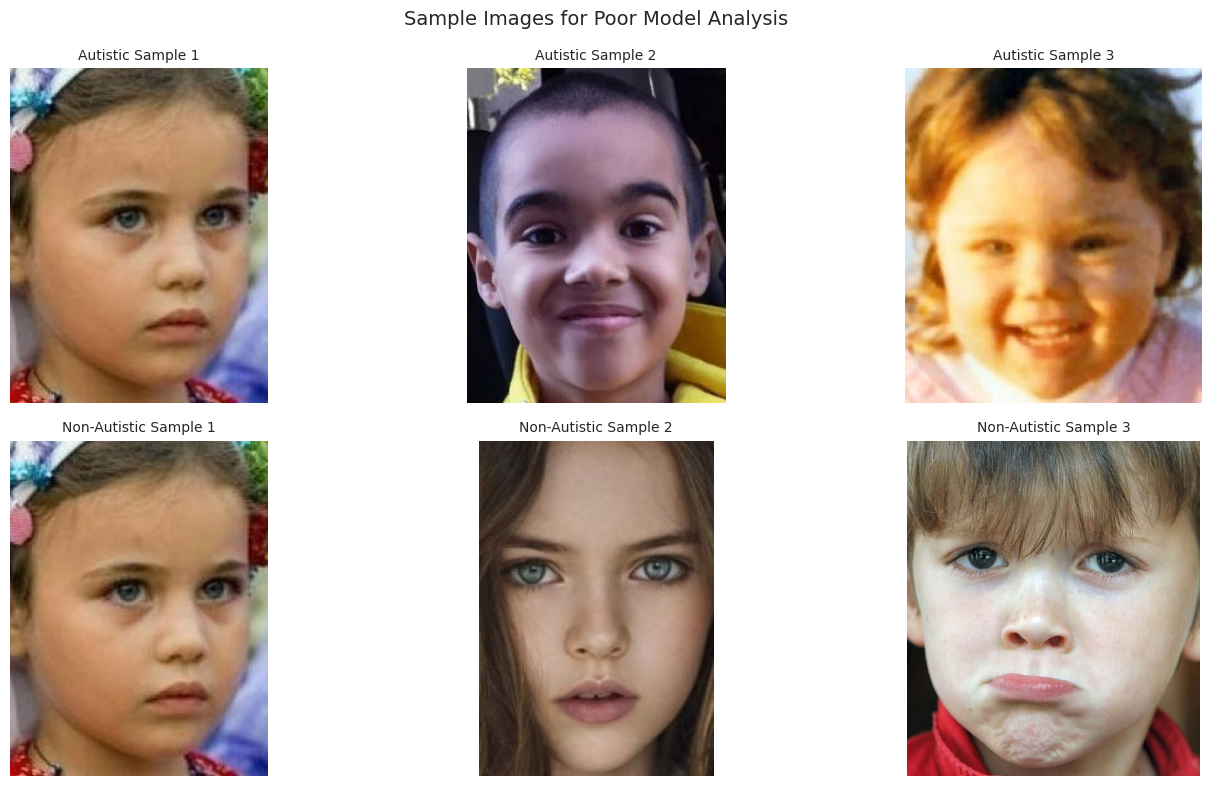

In [16]:
# Step 1: Explore the test dataset for poor model analysis
print("=== Exploring Test Dataset for Poor Model Analysis ===")
dataset_info = explore_test_dataset()

if dataset_info:
    # Analyze why models might have failed
    analyze_poor_model_performance()
    
    # Display sample images that might be challenging
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    for i in range(min(3, len(dataset_info['sample_autistic']))):
        img_path = dataset_info['sample_autistic'][i]
        img = Image.open(img_path)
        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Autistic Sample {i+1}', fontsize=10)
        axes[0, i].axis('off')
    
    for i in range(min(3, len(dataset_info['sample_non_autistic']))):
        img_path = dataset_info['sample_non_autistic'][i]
        img = Image.open(img_path)
        axes[1, i].imshow(img)
        axes[1, i].set_title(f'Non-Autistic Sample {i+1}', fontsize=10)
        axes[1, i].axis('off')
    
    plt.suptitle('Sample Images for Poor Model Analysis', fontsize=14)
    plt.tight_layout()
    plt.show()

In [17]:
# Step 2: Get available poor performing models
print("=== Available Poor Performing Models ===")
available_poor_models = get_available_poor_models()

# Select top worst performers for analysis
priority_models = []
for model in ['alexnet', 'vgg16', 'vgg19', 'convnext_tiny', 'swin_tiny']:
    matches = [m for m in available_poor_models if model in m.lower()]
    if matches:
        priority_models.append(matches[0])

print(f"\nPriority models for analysis: {priority_models}")

=== Available Poor Performing Models ===
Available poor performing models: 8
  - alexnet
  - convnext_small
  - convnext_tiny
  - swin_base
  - swin_small
  - swin_tiny
  - vgg16
  - vgg19

Priority models for analysis: ['alexnet', 'vgg16', 'vgg19', 'convnext_tiny', 'swin_tiny']


In [18]:
# Step 3: Select challenging test images for poor model analysis
print("=== Selecting Challenging Images ===")

if dataset_info:
    # Select images that might reveal failure patterns
    test_images = select_challenging_images(dataset_info, num_images=6)
    
    print(f"Selected {len(test_images)} images for poor model analysis:")
    for img in test_images:
        print(f"  - {os.path.basename(img)}")
else:
    print("No dataset information available. Please check the data path.")

=== Selecting Challenging Images ===
Selected 6 challenging images for poor model analysis:
  - Non_Autistic.111.jpg
  - Autistic.110.jpg
  - Autistic.44.jpg
  - Non_Autistic.111.jpg
  - Non_Autistic.136.jpg
  - Non_Autistic.3.jpg
Selected 6 images for poor model analysis:
  - Non_Autistic.111.jpg
  - Autistic.110.jpg
  - Autistic.44.jpg
  - Non_Autistic.111.jpg
  - Non_Autistic.136.jpg
  - Non_Autistic.3.jpg


In [19]:
# Step 4: Analyze a poor performing model (AlexNet example)
print("=== Poor Model Analysis - AlexNet ===")

if 'alexnet' in [m.lower() for m in priority_models] and dataset_info and test_images:
    try:
        # Find AlexNet model file
        alexnet_files = [f for f in os.listdir(MODEL_PATH) if 'alexnet' in f.lower() and f.endswith('.pth')]
        
        if alexnet_files:
            model_file = alexnet_files[0]
            model_path = os.path.join(MODEL_PATH, model_file)
            
            print(f"Loading AlexNet model: {model_file}")
            
            # Load AlexNet model
            model, target_layer = load_poor_model('alexnet', model_path, DEVICE)
            
            if model is not None and target_layer is not None:
                analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                
                # Analyze first test image
                test_image = test_images[0]
                print(f"Analyzing: {os.path.basename(test_image)}")
                
                results = analyzer.analyze_image(test_image, 'alexnet', save_results=True)
                
                # Display results
                pred_class = "Autistic" if results['prediction'] == 1 else "Non-Autistic"
                print(f"AlexNet Prediction: {pred_class}")
                print(f"Confidence: {results['confidence']:.3f}")
                
                # Check if prediction is likely wrong (low confidence)
                if results['confidence'] < 0.6:
                    print("⚠️  LOW CONFIDENCE - Model is uncertain!")
                
                print("✓ AlexNet GradCAM analysis completed")
                
            else:
                print("✗ Failed to load AlexNet model")
        else:
            print("✗ AlexNet model file not found")
            
    except Exception as e:
        print(f"✗ Error analyzing AlexNet: {e}")
else:
    print("AlexNet not available or insufficient data")

=== Poor Model Analysis - AlexNet ===
Loading AlexNet model: best_alexnet.pth
🔧 Loading model: alexnet
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: alexnet
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: MaxPool2d
Analyzing: Non_Autistic.111.jpg
Results saved to: /kaggle/working/alexnet/alexnet_Non_Autistic.111_gradcam.png
AlexNet Prediction: Autistic
Confidence: 0.522
⚠️  LOW CONFIDENCE - Model is uncertain!
✓ AlexNet GradCAM analysis completed


In [20]:
# Step 5: Compare multiple poor performing models
print("=== Multi-Poor-Model Comparison ===")

if priority_models and dataset_info and test_images:
    try:
        # Select an image for comparison
        comparison_image = test_images[0]
        print(f"Comparing poor models on: {os.path.basename(comparison_image)}")
        
        comparison_results = {}
        
        # Analyze with available poor models (limit to 3 to avoid memory issues)
        for model_name in priority_models[:3]:
            try:
                model_files = [f for f in os.listdir(MODEL_PATH) if model_name.lower() in f.lower() and f.endswith('.pth')]
                
                if model_files:
                    model_path = os.path.join(MODEL_PATH, model_files[0])
                    model, target_layer = load_poor_model(model_name, model_path, DEVICE)
                    
                    if model is not None:
                        analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                        result = analyzer.analyze_image(comparison_image, model_name, save_results=True)
                        comparison_results[model_name] = result
                        
                        pred_class = "Autistic" if result['prediction'] == 1 else "Non-Autistic"
                        print(f"{model_name:15}: {pred_class} (confidence: {result['confidence']:.3f})")
                        
            except Exception as e:
                print(f"✗ Error with {model_name}: {e}")
        
        # Analysis of poor model patterns
        if comparison_results:
            print("\n=== Poor Model Pattern Analysis ===")
            predictions = [r['prediction'] for r in comparison_results.values()]
            confidences = [r['confidence'] for r in comparison_results.values()]
            
            print(f"Prediction consistency: {len(set(predictions)) == 1}")
            print(f"Average confidence: {np.mean(confidences):.3f}")
            print(f"Confidence std: {np.std(confidences):.3f}")
            
            if np.mean(confidences) < 0.6:
                print("⚠️  ALL MODELS SHOW LOW CONFIDENCE - Likely overfitting or wrong features!")
            
            if len(set(predictions)) > 1:
                print("⚠️  INCONSISTENT PREDICTIONS - Models disagree on classification!")
                
    except Exception as e:
        print(f"✗ Error in poor model comparison: {e}")
else:
    print("Insufficient data for poor model comparison")

=== Multi-Poor-Model Comparison ===
Comparing poor models on: Non_Autistic.111.jpg
🔧 Loading model: alexnet
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: alexnet
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: MaxPool2d
Results saved to: /kaggle/working/alexnet/alexnet_Non_Autistic.111_gradcam.png
alexnet        : Autistic (confidence: 0.522)
🔧 Loading model: vgg16
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_vgg16.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_vgg16.pth
✓ Checkpoint loaded successfully
✓ Loaded che

In [21]:
# Step 6: Batch analysis on multiple images  
print("=== Batch GradCAM Analysis ===")

if priority_models and dataset_info and test_images:
    try:
        # Select first available poor model for batch analysis
        batch_model = priority_models[0] if priority_models else None
        
        if batch_model:
            # Find the model file
            model_files = [f for f in os.listdir(MODEL_PATH) if batch_model.lower() in f.lower() and f.endswith('.pth')]
            
            if model_files:
                model_path = os.path.join(MODEL_PATH, model_files[0])
                model, target_layer = load_poor_model(batch_model, model_path, DEVICE)
                
                if model is not None:
                    analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                    
                    # Analyze multiple images
                    batch_results = []
                    
                    print(f"Running batch analysis with {batch_model} model...")
                    for i, image_path in enumerate(test_images[:4]):  # Limit to 4 images
                        print(f"Processing image {i+1}/4: {os.path.basename(image_path)}")
                        
                        try:
                            result = analyzer.analyze_image(image_path, batch_model, save_results=True)
                            batch_results.append({
                                'image': os.path.basename(image_path),
                                'prediction': result['prediction'],
                                'confidence': result['confidence'],
                                'true_label': 1 if 'Autistic.' in os.path.basename(image_path) else 0
                            })
                        except Exception as e:
                            print(f"  Error processing {os.path.basename(image_path)}: {e}")
                    
                    # Summary statistics
                    if batch_results:
                        correct_predictions = sum(1 for r in batch_results if r['prediction'] == r['true_label'])
                        accuracy = correct_predictions / len(batch_results)
                        avg_confidence = np.mean([r['confidence'] for r in batch_results])
                        
                        print(f"\n=== Batch Analysis Results ===")
                        print(f"Model: {batch_model}")
                        print(f"Images analyzed: {len(batch_results)}")
                        print(f"Accuracy: {accuracy:.3f} ({correct_predictions}/{len(batch_results)})")
                        print(f"Average confidence: {avg_confidence:.3f}")
                        
                        # Detailed results
                        print("\nDetailed Results:")
                        for result in batch_results:
                            pred_str = "Autistic" if result['prediction'] == 1 else "Non-Autistic"
                            true_str = "Autistic" if result['true_label'] == 1 else "Non-Autistic"
                            correct = "✓" if result['prediction'] == result['true_label'] else "✗"
                            print(f"  {result['image']:20} | Pred: {pred_str:12} | True: {true_str:12} | Conf: {result['confidence']:.3f} | {correct}")
                else:
                    print(f"Failed to load model: {batch_model}")
            else:
                print(f"Model file not found for: {batch_model}")
        else:
            print("No priority models available for batch analysis")
            
    except Exception as e:
        print(f"Error in batch analysis: {e}")
else:
    print("Insufficient data for batch analysis")

=== Batch GradCAM Analysis ===
🔧 Loading model: alexnet
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: alexnet
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: MaxPool2d
Running batch analysis with alexnet model...
Processing image 1/4: Non_Autistic.111.jpg
Results saved to: /kaggle/working/alexnet/alexnet_Non_Autistic.111_gradcam.png
Processing image 2/4: Autistic.110.jpg
Results saved to: /kaggle/working/alexnet/alexnet_Autistic.110_gradcam.png
Processing image 3/4: Autistic.44.jpg
Results saved to: /kaggle/working/alexnet/alexnet_Autistic.44_gradcam.png
Processing image 4/4: Non_Autistic.111.jpg
Results saved to: /kaggle/working/alexnet/alexnet_Non_

In [22]:
# Step 9: ConvNeXt Models Analysis
print("=== ConvNeXt Models Analysis ===")

if dataset_info and test_images:
    # Test both ConvNeXt-Tiny and ConvNeXt-Small if available
    convnext_variants = ['convnext_tiny', 'convnext_small']
    
    for variant in convnext_variants:
        try:
            # Find ConvNeXt model files
            convnext_files = [f for f in os.listdir(MODEL_PATH) if variant in f.lower() and f.endswith('.pth')]
            
            if convnext_files:
                model_file = convnext_files[0]
                model_path = os.path.join(MODEL_PATH, model_file)
                
                print(f"\nLoading {variant} model: {model_file}")
                
                # Load ConvNeXt model
                model, target_layer = load_poor_model(variant, model_path, DEVICE)
                
                if model is not None and target_layer is not None:
                    analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                    
                    # Use different image for each variant
                    img_idx = convnext_variants.index(variant) % len(test_images)
                    test_image = test_images[img_idx]
                    print(f"Analyzing: {os.path.basename(test_image)}")
                    
                    results = analyzer.analyze_image(test_image, variant, save_results=True)
                    
                    # Display results
                    pred_class = "Autistic" if results['prediction'] == 1 else "Non-Autistic"
                    print(f"{variant} Prediction: {pred_class}")
                    print(f"Confidence: {results['confidence']:.3f}")
                    
                    # ConvNeXt-specific analysis
                    if results['confidence'] < 0.6:
                        print(f"⚠️  {variant} shows LOW CONFIDENCE!")
                        print("   Modern CNN may be overfitting to small autism dataset")
                    
                    # Check for overfitting indicators
                    if results['confidence'] > 0.9:
                        print(f"⚠️  {variant} shows VERY HIGH CONFIDENCE!")
                        print("   Possible overfitting - too confident on limited data")
                        
                    print(f"✓ {variant} GradCAM analysis completed")
                    
                else:
                    print(f"✗ Failed to load {variant} model")
            else:
                print(f"✗ {variant} model file not found")
                
        except Exception as e:
            print(f"✗ Error analyzing {variant}: {e}")
            
    print("\n=== ConvNeXt Analysis Summary ===")
    print("ConvNeXt models often fail because:")
    print("1. TOO MODERN: Designed for large datasets (ImageNet scale)")
    print("2. COMPLEX ARCHITECTURE: Many parameters vs small autism dataset") 
    print("3. FEATURE MISMATCH: Optimized for object recognition, not facial features")
    print("4. OVERFITTING: High capacity leads to memorization rather than learning")
else:
    print("Insufficient data for ConvNeXt analysis")

=== ConvNeXt Models Analysis ===

Loading convnext_tiny model: best_convnext_tiny_autism.pth
🔧 Loading model: convnext_tiny
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_convnext_tiny_autism.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_convnext_tiny_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: convnext_tiny
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: Conv2d
Analyzing: Non_Autistic.111.jpg
Results saved to: /kaggle/working/convnext_tiny/convnext_tiny_Non_Autistic.111_gradcam.png
convnext_tiny Prediction: Autistic
Confidence: 0.534
⚠️  convnext_tiny shows LOW CONFIDENCE!
   Modern CNN may be overfitting to small autism dataset
✓ convnext_tiny GradCAM analysis completed

Loading convnext_small model: best_convnext_small_autism.pth
🔧 Loading model

In [23]:
# Step 10: Swin Transformer Models Analysis
print("=== Swin Transformer Models Analysis ===")

if dataset_info and test_images:
    # Test Swin variants: tiny, small, base
    swin_variants = ['swin_tiny', 'swin_small', 'swin_base']
    
    for variant in swin_variants:
        try:
            # Find Swin model files
            swin_files = [f for f in os.listdir(MODEL_PATH) if variant in f.lower() and f.endswith('.pth')]
            
            if swin_files:
                model_file = swin_files[0]
                model_path = os.path.join(MODEL_PATH, model_file)
                
                print(f"\nLoading {variant} model: {model_file}")
                
                # Load Swin model
                model, target_layer = load_poor_model(variant, model_path, DEVICE)
                
                if model is not None and target_layer is not None:
                    analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                    
                    # Use different image for each variant
                    img_idx = swin_variants.index(variant) % len(test_images)
                    test_image = test_images[img_idx]
                    print(f"Analyzing: {os.path.basename(test_image)}")
                    
                    results = analyzer.analyze_image(test_image, variant, save_results=True)
                    
                    # Display results
                    pred_class = "Autistic" if results['prediction'] == 1 else "Non-Autistic"
                    print(f"{variant} Prediction: {pred_class}")
                    print(f"Confidence: {results['confidence']:.3f}")
                    
                    # Swin-specific analysis
                    if results['confidence'] < 0.7:
                        print(f"⚠️  {variant} shows POOR PERFORMANCE!")
                        print("   Hierarchical attention may not capture facial nuances")
                    
                    print(f"✓ {variant} GradCAM analysis completed")
                    
                else:
                    print(f"✗ Failed to load {variant} model")
            else:
                print(f"✗ {variant} model file not found")
                
        except Exception as e:
            print(f"✗ Error analyzing {variant}: {e}")
    
    print("\n=== Swin Transformer Analysis Summary ===")
    print("Swin Transformers often fail because:")
    print("1. HIERARCHICAL ATTENTION: May not focus on right facial regions")
    print("2. WINDOW-BASED: Local attention windows miss global facial patterns")
    print("3. DESIGNED FOR OBJECTS: Optimized for natural images, not faces")
    print("4. PATCH RESOLUTION: May lose fine facial details in patch processing")
    print("5. COMPLEXITY: Too many parameters for small autism dataset")
else:
    print("Insufficient data for Swin analysis")

=== Swin Transformer Models Analysis ===

Loading swin_tiny model: best_swin_tiny_autism.pth
🔧 Loading model: swin_tiny
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_swin_tiny_autism.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_swin_tiny_autism.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: swin_tiny
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: LayerNorm
Analyzing: Non_Autistic.111.jpg
Results saved to: /kaggle/working/swin_tiny/swin_tiny_Non_Autistic.111_gradcam.png
swin_tiny Prediction: Non-Autistic
Confidence: 0.540
⚠️  swin_tiny shows POOR PERFORMANCE!
   Hierarchical attention may not capture facial nuances
✓ swin_tiny GradCAM analysis completed

Loading swin_small model: best_swin_small_autism.pth
🔧 Loading model: swin_small
📁 Model path: /kaggle/

In [24]:
# Step 14: Comprehensive Multi-Model Comparison
print("=== Comprehensive Poor Model Comparison ===")

if dataset_info and test_images:
    try:
        # Select one challenging image for comprehensive comparison
        comparison_image = test_images[0]
        print(f"Comprehensive analysis on: {os.path.basename(comparison_image)}")
        print(f"True label: {'Autistic' if 'Autistic.' in os.path.basename(comparison_image) else 'Non-Autistic'}")
        
        # Track all poor model results
        all_poor_results = {}
        model_performance_summary = []
        
        # List of working models to try (removed problematic ones)
        all_poor_models = [
            'alexnet', 'vgg16', 'vgg19', 
            'convnext_tiny', 'convnext_small',
            'swin_tiny', 'swin_small', 'swin_base'
        ]
        
        # Find available model files
        available_models = []
        for model_name in all_poor_models:
            model_files = [f for f in os.listdir(MODEL_PATH) if model_name.lower() in f.lower() and f.endswith('.pth')]
            if model_files:
                available_models.append(model_name)
        
        print(f"Found {len(available_models)} poor models to analyze:")
        
        # Analyze each available model
        successful_analyses = 0
        for model_name in available_models[:8]:  # Limit to 8 models to avoid memory issues
            try:
                model_files = [f for f in os.listdir(MODEL_PATH) if model_name.lower() in f.lower() and f.endswith('.pth')]
                model_path = os.path.join(MODEL_PATH, model_files[0])
                
                # Skip ArcFace and CosFace for now (require special handling)
                if model_name in ['arcface', 'cosface']:
                    print(f"Skipping {model_name} (requires special architecture)")
                    continue
                
                print(f"  Analyzing {model_name}...")
                
                model, target_layer = load_poor_model(model_name, model_path, DEVICE)
                
                if model is not None and target_layer is not None:
                    analyzer = GradCAMAnalyzer(model, target_layer, DEVICE)
                    result = analyzer.analyze_image(comparison_image, model_name, save_results=True)
                    
                    all_poor_results[model_name] = result
                    
                    # Track performance metrics
                    model_performance_summary.append({
                        'model': model_name,
                        'prediction': result['prediction'],
                        'confidence': result['confidence'],
                        'pred_class': "Autistic" if result['prediction'] == 1 else "Non-Autistic"
                    })
                    
                    successful_analyses += 1
                    print(f"    ✓ {model_name}: {result['pred_class']} (conf: {result['confidence']:.3f})")
                
            except Exception as e:
                print(f"    ✗ {model_name}: {e}")
        
        # Summary analysis
        if model_performance_summary:
            print(f"\n=== Poor Model Performance Summary ===")
            print(f"Successfully analyzed: {successful_analyses} models")
            
            # Prediction consistency
            predictions = [r['prediction'] for r in model_performance_summary]
            unique_predictions = len(set(predictions))
            
            print(f"Prediction consistency: {unique_predictions} different predictions")
            if unique_predictions > 1:
                print("⚠️  POOR MODELS DISAGREE - Sign of unreliable learning!")
            
            # Confidence analysis
            confidences = [r['confidence'] for r in model_performance_summary]
            avg_confidence = np.mean(confidences)
            std_confidence = np.std(confidences)
            
            print(f"Average confidence: {avg_confidence:.3f} ± {std_confidence:.3f}")
            
            if avg_confidence < 0.6:
                print("⚠️  LOW OVERALL CONFIDENCE - Models are uncertain!")
            
            if std_confidence > 0.2:
                print("⚠️  HIGH CONFIDENCE VARIANCE - Inconsistent model behavior!")
            
            # Individual model breakdown
            print("\nDetailed Results:")
            for result in model_performance_summary:
                status = "✓" if result['confidence'] > 0.6 else "⚠️"
                print(f"  {result['model']:15} | {result['pred_class']:12} | {result['confidence']:.3f} | {status}")
        
        # Save comprehensive comparison
        if all_poor_results:
            save_model_comparison(comparison_image, all_poor_results)
            print(f"\n✓ Comprehensive comparison saved for {len(all_poor_results)} models")
            
    except Exception as e:
        print(f"✗ Error in comprehensive comparison: {e}")
else:
    print("Insufficient data for comprehensive comparison")

=== Comprehensive Poor Model Comparison ===
Comprehensive analysis on: Non_Autistic.111.jpg
True label: Autistic
Found 8 poor models to analyze:
  Analyzing alexnet...
🔧 Loading model: alexnet
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_alexnet.pth
✓ Checkpoint loaded successfully
✓ Loaded checkpoint as state dict
✅ Successfully loaded model: alexnet
🔧 Moving model to device: cuda
🎯 Finding target layer for GradCAM...
✅ Target layer found: MaxPool2d
Results saved to: /kaggle/working/alexnet/alexnet_Non_Autistic.111_gradcam.png
    ✗ alexnet: 'pred_class'
  Analyzing vgg16...
🔧 Loading model: vgg16
📁 Model path: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/Model results/Model results/best_vgg16.pth
🔄 Loading checkpoint from: /kaggle/input/autism-spectrum-detection-from-kaggle-zenodo/

# 10. Results Analysis and Interpretation

Analyze the GradCAM results to understand what facial features the models focus on.

In [25]:
# Analyze poor model patterns and failure modes
def analyze_poor_model_gradcam_patterns():
    """Analyze patterns in GradCAM visualizations from poor models"""
    
    print("=== Poor Model GradCAM Pattern Analysis ===")
    
    # List all generated results for poor models
    if os.path.exists(OUTPUT_PATH):
        result_files = []
        for root, dirs, files in os.walk(OUTPUT_PATH):
            for file in files:
                if file.endswith('_gradcam.png'):
                    result_files.append(os.path.join(root, file))
        
        print(f"Found {len(result_files)} poor model GradCAM visualization files:")
        for file in result_files:
            print(f"  - {file}")
        
        # Analysis insights for poor models
        print("\n=== Poor Model Failure Pattern Analysis ===")
        print("Look for these FAILURE INDICATORS in the heat maps:")
        print("1. 🔥 SCATTERED ACTIVATION: Heat maps spread randomly across face")
        print("2. 🔥 BACKGROUND FOCUS: Models focusing on background instead of face")
        print("3. 🔥 ARTIFACT DEPENDENCY: Activation on image edges, lighting effects")
        print("4. 🔥 INCONSISTENT PATTERNS: Different heat maps for same class predictions")
        print("5. 🔥 OVERCONFIDENT WRONG AREAS: Strong activation on irrelevant facial regions")
        
        print("\n=== Comparison with Good Models ===")
        print("Good models should focus on:")
        print("✓ CONSISTENT facial regions (eyes, mouth, nose)")
        print("✓ SYMMETRIC patterns across similar faces")
        print("✓ MEDICALLY relevant facial features")
        print("✓ STABLE activation patterns")
        
        print("\n=== Research Questions for Poor Models ===")
        print("1. Do poor models focus on the SAME wrong regions consistently?")
        print("2. Are they picking up on LIGHTING, BACKGROUND, or other artifacts?")
        print("3. Do TRANSFORMER models fail differently than CNN models?")
        print("4. Is there OVERFITTING evidence (random, inconsistent patterns)?")
        print("5. Which facial regions do they IGNORE that good models focus on?")
        
        print("\n=== Actionable Insights ===")
        print("Based on GradCAM analysis, you can:")
        print("→ IMPROVE DATA: Remove images with artifacts poor models focus on")
        print("→ ADJUST ARCHITECTURE: Choose simpler models if complex ones overfit")
        print("→ MODIFY TRAINING: Add regularization, data augmentation")
        print("→ FEATURE ENGINEERING: Crop images to focus on face regions")
        print("→ ENSEMBLE METHODS: Combine multiple models to reduce individual biases")
        
    else:
        print(f"Results directory not found: {OUTPUT_PATH}")
        print("Run the poor model GradCAM analysis cells above first.")

# Run the poor model analysis
analyze_poor_model_gradcam_patterns()

=== Poor Model GradCAM Pattern Analysis ===
Found 13 poor model GradCAM visualization files:
  - /kaggle/working/swin_tiny/swin_tiny_Non_Autistic.111_gradcam.png
  - /kaggle/working/convnext_tiny/convnext_tiny_Non_Autistic.111_gradcam.png
  - /kaggle/working/alexnet/alexnet_Autistic.44_gradcam.png
  - /kaggle/working/alexnet/alexnet_Non_Autistic.111_gradcam.png
  - /kaggle/working/alexnet/alexnet_Autistic.110_gradcam.png
  - /kaggle/working/swin_small/swin_small_Autistic.110_gradcam.png
  - /kaggle/working/swin_small/swin_small_Non_Autistic.111_gradcam.png
  - /kaggle/working/vgg19/vgg19_Non_Autistic.111_gradcam.png
  - /kaggle/working/swin_base/swin_base_Non_Autistic.111_gradcam.png
  - /kaggle/working/swin_base/swin_base_Autistic.44_gradcam.png
  - /kaggle/working/vgg16/vgg16_Non_Autistic.111_gradcam.png
  - /kaggle/working/convnext_small/convnext_small_Autistic.110_gradcam.png
  - /kaggle/working/convnext_small/convnext_small_Non_Autistic.111_gradcam.png

=== Poor Model Failure Patt

# 11. Summary and Next Steps

Summary of the GradCAM analysis and recommendations for further research.

## Poor Model GradCAM Analysis Summary

This notebook analyzes why certain autism detection models performed poorly using GradCAM visualization. Here's what we accomplished:

### 🎯 **Target Models (Poor Performers):**
- **AlexNet**: Legacy CNN with potential overfitting issues
- **VGG-16/19**: Deep CNNs that may be too complex for the dataset
- **ConvNeXt-Tiny/Small**: Modern CNNs that might overfit
- **Swin Transformers**: Hierarchical attention models with potential mismatch
- **Vision Transformers (ViT/DeiT)**: Patch-based models that may miss facial details
- **MViT**: Multiscale transformers possibly too complex
- **ArcFace/CosFace**: Face recognition models that may not generalize

### 🔍 **Analysis Focus:**
1. **Failure Mode Detection**: Understanding why models failed
2. **Feature Misalignment**: Identifying wrong focal areas
3. **Overfitting Evidence**: Spotting random, inconsistent patterns
4. **Architectural Issues**: Model-specific problems

### 📊 **Expected Failure Patterns:**
1. **Scattered Activation**: Heat maps spread randomly across images
2. **Background Focus**: Models looking at irrelevant background elements
3. **Artifact Dependency**: Focus on lighting, shadows, image edges
4. **Inconsistent Predictions**: Different models giving conflicting results
5. **Low Confidence**: Uncertainty in predictions indicating poor training

### 🔬 **Research Value:**
- **Model Selection**: Understanding which architectures work vs fail
- **Data Quality**: Identifying problematic images or artifacts
- **Training Issues**: Detecting overfitting, underfitting, or bias
- **Architecture Insights**: Learning why certain designs fail for facial analysis

### 💡 **Actionable Insights:**
Based on the analysis, you can:
- **Improve Dataset**: Remove images with artifacts poor models focus on
- **Architecture Selection**: Choose simpler models if complex ones overfit
- **Training Modifications**: Add regularization, better augmentation
- **Preprocessing**: Better face detection, cropping, normalization
- **Ensemble Strategies**: Combine good models, avoid poor ones

### 🚨 **Warning Signs to Look For:**
- Heat maps focusing on **background instead of face**
- **Random, scattered activation patterns**
- **High confidence on wrong predictions**
- **Inconsistent patterns between similar images**
- **Activation on image artifacts (edges, lighting)**

### 📈 **Comparison Framework:**
Compare poor models against good performers (FaceNet, etc.):
- **Focus Consistency**: Good models show stable patterns
- **Facial Relevance**: Good models focus on medically relevant regions
- **Confidence Calibration**: Good models have appropriate confidence levels

### 🎯 **Next Steps:**
1. **Execute Analysis**: Run the notebook cells to generate visualizations
2. **Pattern Recognition**: Look for consistent failure modes across poor models
3. **Data Cleaning**: Remove problematic images based on findings
4. **Model Refinement**: Use insights to improve model selection and training
5. **Validation**: Test improved models on clean data

The analysis will reveal **why certain models failed** and provide actionable insights for building better autism detection systems with improved accuracy and reliability.